In [103]:
import pandas as pd
import numpy as np
from datetime import datetime

In [104]:
from sklearn.decomposition import PCA

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [5]:
data=pd.read_csv("clean_data_for_analysis.csv")

In [6]:
data

,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform
0,Insidious: The Last Key,Movie,2018-01-05,6180.0,Horror,NaN,49.0,5.7,63102,tt5726086,10000000.0,1.678856e+08,others
1,Stratton,Movie,2018-01-05,5700.0,Action,NaN,26.0,4.8,5405,tt3567666,NaN,2.572120e+05,others
2,Sweet Country,Movie,2018-04-06,6780.0,Adventure,NaN,88.0,6.9,8855,tt6958212,NaN,1.849718e+06,others
3,The Commuter,Movie,2018-01-12,6240.0,Action,NaN,56.0,6.3,118954,tt1590193,30000000.0,1.199424e+08,others
4,Freak Show,Movie,2018-01-12,5460.0,Comedy,NaN,54.0,6.5,4376,tt5089534,NaN,2.065700e+04,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,Avatar: The Way of Water,Movie,2022-12-16,11520.0,Action,3.0,67.0,7.7,355332,tt1630029,350000000.0,2.315057e+09,others
1149,Puss in Boots: The Last Wish,Movie,2022-12-21,6120.0,Animation,1.0,73.0,7.9,117294,tt3915174,90000000.0,4.800034e+08,others
1150,Wildcat,Movie,2022-12-30,6360.0,Documentary,NaN,71.0,7.8,2605,tt13622204,NaN,NaN,others
1151,Babylon,Movie,2022-12-23,11340.0,Comedy,3.0,60.0,7.2,107214,tt10640346,78000000.0,6.337762e+07,others


In [7]:
features=data[['Release', 'Runtime', 'Genre', 'Budget', 'Platform']]

In [8]:
outcome=data['Gross']

In [9]:
features

,Release,Runtime,Genre,Budget,Platform
0,2018-01-05,6180.0,Horror,10000000.0,others
1,2018-01-05,5700.0,Action,NaN,others
2,2018-04-06,6780.0,Adventure,NaN,others
3,2018-01-12,6240.0,Action,30000000.0,others
4,2018-01-12,5460.0,Comedy,NaN,others
...,...,...,...,...,...
1148,2022-12-16,11520.0,Action,350000000.0,others
1149,2022-12-21,6120.0,Animation,90000000.0,others
1150,2022-12-30,6360.0,Documentary,NaN,others
1151,2022-12-23,11340.0,Comedy,78000000.0,others


In [10]:
# Create a DataFrame with a datetime column
df = pd.DataFrame({'date_column': pd.to_datetime(['2023-04-15 12:34:56', '2023-04-16 01:23:45', '2023-04-17 09:00:00'])})

# Convert datetime to float representing days since a reference date with fractional part for hours, minutes, and seconds
df['date_column_float'] = (df['date_column'] - pd.Timestamp('1970-01-01')) / pd.Timedelta('1D')

print(df)

          date_column  date_column_float
0 2023-04-15 12:34:56       19462.524259
1 2023-04-16 01:23:45       19463.058160
2 2023-04-17 09:00:00       19464.375000


In [11]:
test=features['Release'][0]
test

'2018-01-05'

In [12]:
dt_obj = datetime.strptime(test, '%Y-%m-%d')

In [13]:
dt_obj

datetime.datetime(2018, 1, 5, 0, 0)

In [14]:
unix_datetime = int(dt_obj.timestamp())

In [15]:
unix_datetime

1515139200

In [16]:
convert_to_unix = lambda x: int(datetime.strptime(x, '%Y-%m-%d').timestamp())

features['Release']=features['Release'].apply(convert_to_unix)

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_9088/2456918480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Release']=features['Release'].apply(convert_to_unix)


In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
features

,Release,Runtime,Genre,Budget,Platform
0,1515139200,6180.0,Horror,10000000.0,others
1,1515139200,5700.0,Action,NaN,others
2,1522998000,6780.0,Adventure,NaN,others
3,1515744000,6240.0,Action,30000000.0,others
4,1515744000,5460.0,Comedy,NaN,others
...,...,...,...,...,...
1148,1671177600,11520.0,Action,350000000.0,others
1149,1671609600,6120.0,Animation,90000000.0,others
1150,1672387200,6360.0,Documentary,NaN,others
1151,1671782400,11340.0,Comedy,78000000.0,others


In [85]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder()
genre=features['Genre']
one_hot = encoder.fit_transform(features[['Genre']])
one_hot_df = pd.DataFrame(one_hot.toarray())
df_genre=pd.concat([genre, one_hot_df], axis=1)

In [86]:
encoder.categories_

[array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
        'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
        'Music', 'Mystery', 'Sci-Fi', 'Thriller'], dtype=object)]

In [87]:
df_genre=df_genre.drop(columns='Genre')

In [88]:
df_genre.columns=encoder.categories_

In [89]:
df_genre['Genre']=genre

In [90]:
features

,Release,Runtime,Genre,Budget,Platform
0,1515139200,6180.0,Horror,10000000.0,others
1,1515139200,5700.0,Action,NaN,others
2,1522998000,6780.0,Adventure,NaN,others
3,1515744000,6240.0,Action,30000000.0,others
4,1515744000,5460.0,Comedy,NaN,others
...,...,...,...,...,...
1148,1671177600,11520.0,Action,350000000.0,others
1149,1671609600,6120.0,Animation,90000000.0,others
1150,1672387200,6360.0,Documentary,NaN,others
1151,1671782400,11340.0,Comedy,78000000.0,others


In [91]:
df_genre

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Sci-Fi,Thriller,Genre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Horror
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Action
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Adventure
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Action
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Action
1149,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Animation
1150,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Documentary
1151,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Comedy


In [21]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder()
genre=features['Platform']
one_hot = encoder.fit_transform(features[['Platform']])
one_hot_df = pd.DataFrame(one_hot.toarray())
df_one_hot = pd.concat([genre, one_hot_df], axis=1)

In [22]:
df_platform=df_one_hot

In [23]:
df_platform

,Platform,0,1,2,3,4
0,others,0.0,0.0,0.0,0.0,1.0
1,others,0.0,0.0,0.0,0.0,1.0
2,others,0.0,0.0,0.0,0.0,1.0
3,others,0.0,0.0,0.0,0.0,1.0
4,others,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
1148,others,0.0,0.0,0.0,0.0,1.0
1149,others,0.0,0.0,0.0,0.0,1.0
1150,others,0.0,0.0,0.0,0.0,1.0
1151,others,0.0,0.0,0.0,0.0,1.0


In [25]:
features['Budget'].isna().sum()

653

In [27]:
no_nan_features=features.dropna(how='any')

In [32]:
df_genre=df_genre.drop(columns='Genre')

In [63]:
df_genre=df_genre.drop(columns='Genre')

In [64]:
df_genre.columns=encoder.categories_

In [117]:
colum_names=[i[0] for i in df_genre.columns]

In [118]:
df_genre.columns=colum_names

In [66]:
no_nan_features_genre=no_nan_features.drop(columns='Platform')

In [69]:
no_nan_features_genre=no_nan_features_genre.drop(columns='Genre')

In [119]:
no_nan_features=pd.concat([no_nan_features_genre, df_genre], join='inner', axis=1)

In [121]:
no_nan_features=no_nan_features.drop(columns='Genre')

In [97]:
labels=data['Metascore']

In [122]:
first_set=pd.concat([no_nan_features, labels], join='inner', axis=1)

In [101]:
first_set=first_set.drop(columns=('Genre',))

In [131]:
first_set=first_set.dropna()

In [132]:
X_train, X_test, y_train, y_test=train_test_split(first_set.loc[:,:'Thriller',], first_set['Metascore'], train_size=.70)

In [144]:
X_train

,Release,Runtime,Budget,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Sci-Fi,Thriller
154,1536908400,5880.0,6000000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,1547193600,7560.0,37500000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1057,1664348400,10020.0,22000000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,1538118000,6660.0,29000000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
329,1565938800,6540.0,20000000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,1556866800,7500.0,40000000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
914,1642752000,5880.0,40500000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
267,1555657200,8340.0,8500000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,1518163200,6300.0,55000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
# creating a regression model
model = LinearRegression()

# fitting the model
model.fit(X_train,y_train)

LinearRegression()

In [135]:
# making predictions
predictions = model.predict(X_test)

In [136]:
predictions

array([ 45.74691124,  49.31322416,  65.41873329,  59.47751798,
        47.47327488,  51.88041397,  47.14451394,  63.20128957,
        58.86925425,  56.64156962,  53.21241239,  47.28334519,
        45.71771998,  61.5496554 ,  50.30959532,  62.7070477 ,
        50.76810535,  62.02206639,  49.12706911,  59.82398572,
        60.31114453,  57.8894991 ,  61.85209633,  62.73743002,
        57.42287353,  52.67275257,  50.2812075 ,  66.69261257,
        59.70545891,  58.7365635 ,  50.34728467,  57.87314727,
        65.51525283,  46.56343827,  55.44454742,  54.80705856,
        55.81309277,  52.05145178,  49.40955866,  52.3747491 ,
        57.81791381,  54.15731892,  52.30786023,  46.57718245,
        55.92118858,  49.49876083, 100.71641671,  61.8910997 ,
        50.85578924,  53.74086988,  60.6090055 ,  49.34464064,
        68.86121982,  42.77082951,  55.68182038,  43.85767338,
        66.35581346,  48.64091685,  51.05128024,  47.70816238,
        50.22921551,  58.86174942,  83.59638308,  49.39

In [137]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  249.00816895022027
mean_absolute_error :  13.103378379048468


In [138]:
import matplotlib.pyplot as plt

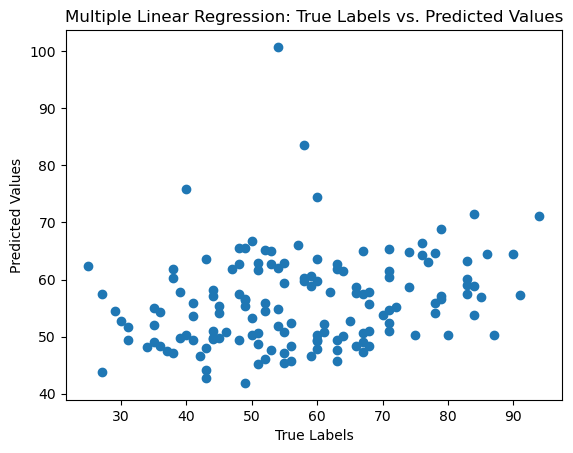

In [140]:
plt.scatter(y_test, predictions)
plt.xlabel("True Labels")
plt.ylabel("Predicted Values")
plt.title("Multiple Linear Regression: True Labels vs. Predicted Values")
plt.show()

In [141]:
residuals = y_test - predictions

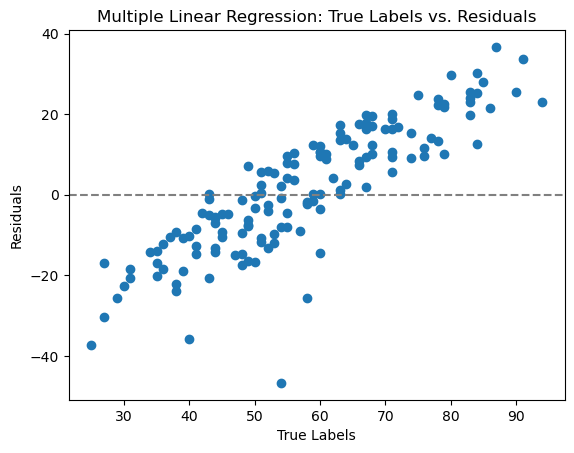

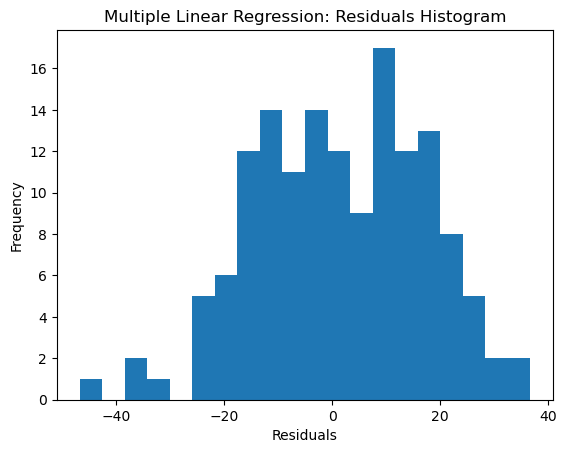

In [143]:
plt.scatter(y_test, residuals)
plt.xlabel("True Labels")
plt.ylabel("Residuals")
plt.axhline(y=0, color='gray', linestyle='dashed')
plt.title("Multiple Linear Regression: True Labels vs. Residuals")
plt.show()


plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Multiple Linear Regression: Residuals Histogram")
plt.show()